## 7. Group Assignment & Presentation



__You should be able to start up on this exercise after Lecture 1.__

*This exercise must be a group effort. That means everyone must participate in the assignment.*

In this assignment you will solve a data science problem end-to-end, pretending to be recently hired data scientists in a company. To help you get started, we've prepared a checklist to guide you through the project. Here are the main steps that you will go through:

1. Frame the problem and look at the big picture
2. Get the data
3. Explore and visualise the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models
7. Present your solution (video presentation) 

In each step we list a set of questions that one should have in mind when undertaking a data science project. The list is not meant to be exhaustive, but does contain a selection of the most important questions to ask. We will be available to provide assistance with each of the steps, and will allocate some part of each lesson towards working on the projects.

Your group must submit a _**single**_ Jupyter notebook, structured in terms of the first 6 sections listed above (the seventh will be a video uploaded to some streaming platform, e.g. YouTube, Vimeo, etc.).

### 1. Analysis: Frame the problem and look at the big picture
1. Find a problem/task that everyone in the group finds interesting
2. Define the objective in business terms
3. How should you frame the problem (supervised/unsupervised etc.)?
4. How should performance be measured?

## 1. Analysis: Frame the problem and look at the big picture
The following project will consist of a machine-learning system that identifies and classifies Pokemon from images, allowing the users to:

##### 1. Verify if the image displays a Pokemon:
Determine if an uploaded image contains a Pokemon or not, so that the identification of a Pokemon can be automated, saving time with large datasets.

##### 2. Precise identification by name:
Once it is clear the image shows a Pokemon, it should be able to identify which species it is. This would enable automated cataloging, which could improve inventori management for collectibles or could even be implemented into AR Pokemon games.

##### 3. Type classification:
Finally, the system should be able to predict the displayed Pokemon type/s'. This would allow the end user to achieve greater personalization, reaching a point in which it could recommend strategies, based on the opponent's Pokemon team.


#### Framing the problem
Supervised learning is the most appropiate approach, since a complete dataset can be supplied. Moreover, since the data is not continuous, classification will be used:

- Is it a Pokemon?
To answer this question, Binary classification will be implemented through a Convolutional Neural Network (CNN) for image classification. In order to train this model, a dataset containing images of pokemon and animals will be provided. 
To measure the performace of this model, there are a few metrics to take into account:
  - Accuracy: Measurement of how many guesses are correct. Above 90% should be an acceptable value.
  - Precision: Fraction of the predicted Pokemon that are actually Pokemon:     $$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$
  - Recall: Fraction of actual Pokémon images correctly identified: $$\text{Recall}= \frac {\text{True Positives}}{\text{True Positives + False Negatives}} $$
  - F1 score: since the dataset is imbalanced, a harmonic mean of precision and recall is also useful: $$\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$


  
- Which Pokemon species is it?
To answer this question, a Convolutional Neural Network will also be implemented. However, the answer to this question is not binary, so it requires a **multiclass** setup. To train this model, a dataset with pokemon images and their names will be provided.
To measure the performace of this model, there are a few metrics to take into account:
  - Accuracy: Measurement of how many guesses are correct. Above 90% should be an acceptable value.
  - Top-K Accuracy: Fraction of cases where the correct class is among the top K predictions.
  - Confusion Matrix: Visual representation of model errors (misclassified Pokemon species).
  - Per-Class Precision/Recall/F1: Evaluate performance on individual Pokémon classes to identify weak spots.



- Which is this species' type?
To answer this quesiton, a multilabel CNN will be implemented, as the expected output could consist of multiple elements, since some pokemon species possess 2 types.
To measure the performace of this model, there are a few metrics to take into account:
  - Hamming Loss: Fraction of incorrectly predicted labels (either false positive or false negative): $$\text{Hamming Loss} = \frac{\text{Number of Incorrect Labels}}{\text{Total Labels}}$$
  - Precision: Fraction of predicted types that are correct (averaged across labels).
  - Recall: Fraction of actual types correctly identified: $$\text{Recall}= \frac {\text{True Positives}}{\text{True Positives + False Negatives}} $$
  - F1 score: since the dataset is imbalanced, a harmonic mean of precision and recall is also useful: $$\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$
  - Mean Average Precision (mAP): Average precision computed for each type, capturing how well the model ranks true positives.

### 2. Get the data
1. Find and document where you can get the data from
2. Get the data
3. Check the size and type of data (time series, geographical etc)

## 2. Get the data

### Data Sources

To train the model for Pokémon classification, two datasets have been selected to cover the primary tasks: identifying Pokémon and distinguishing them from non-Pokémon images. These datasets provide a robust foundation for the project.

The Pokemon Image dataset comes from Kaggle, and can be found in the following [link](https://www.kaggle.com/datasets/divyanshusingh369/complete-pokemon-library-32k-images-and-csv). This dataset contains a folder with images of pokemons called "Pokemon Images DB", a folder with images of Pokemons in all their possible forms including games from all 9 generations – which will not be used in the project – and a csv file with Pokemon names and some stats: types, height, weight, abilities, EV Yield, Catch Rate, Base Friendship and Base Exp. This set aims to be used to classify Pokemon by name and type

The Wildlife Animals Image dataset also comes from Kaggle, and can be found in the following [link](https://www.kaggle.com/datasets/anshulmehtakaggl/wildlife-animals-images). This dataset contains images of various animals and is meant to serve so the model can identify pokemon or not.

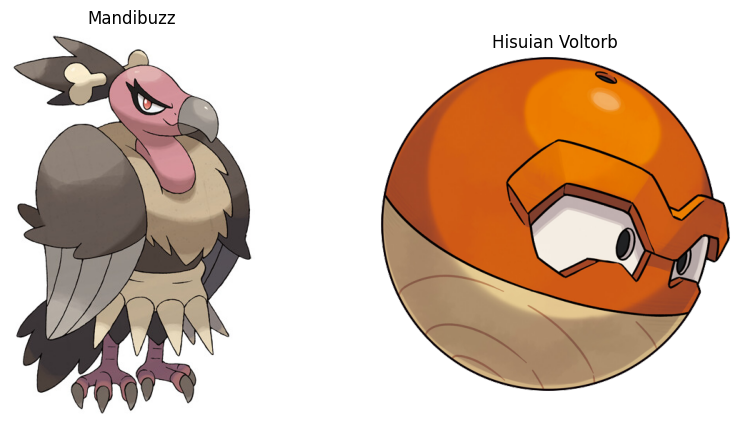

,Pokemon,Type,Species,Height,Weight,Abilities,EV Yield,Catch Rate,Base Friendship,Base Exp,...,Defense Max,Special Attack Base,Special Attack Min,Special Attack Max,Special Defense Base,Special Defense Min,Special Defense Max,Speed Base,Speed Min,Speed Max
0,Abomasnow,"Grass, Ice",Frost Tree Pokémon,2.2 m (7′03″),135.5 kg (298.7 lbs),"1. Snow Warning, Soundproof (hidden ability)","1 Attack, 1 Sp. Atk","60 (7.8% with PokéBall, full HP)",50 (normal),173,...,273,92,170,311,85,157,295,60,112,240
1,Mega Abomasnow,"Grass, Ice",Frost Tree Pokémon,2.7 m (8′10″),185.0 kg (407.9 lbs),1. Snow Warning,"1 Attack, 1 Sp. Atk","60 (7.8% with PokéBall, full HP)",50 (normal),208,...,339,132,242,399,105,193,339,30,58,174
2,Abra,Psychic,Psi Pokémon,0.9 m (2′11″),19.5 kg (43.0 lbs),"1. Synchronize, 2. Inner Focus, Magic Guard (h...",1 Sp. Atk,"200 (26.1% with PokéBall, full HP)",50 (normal),62,...,141,105,193,339,55,103,229,90,166,306
3,Absol,Dark,Disaster Pokémon,1.2 m (3′11″),47.0 kg (103.6 lbs),"1. Pressure, 2. Super Luck, Justified (hidden ...",2 Attack,"30 (3.9% with PokéBall, full HP)",35 (lower than normal),163,...,240,75,139,273,60,112,240,75,139,273
4,Mega Absol,Dark,Disaster Pokémon,1.2 m (3′11″),49.0 kg (108.0 lbs),1. Magic Bounce,2 Attack,"30 (3.9% with PokéBall, full HP)",35 (lower than normal),198,...,240,115,211,361,60,112,240,115,211,361


In [15]:
import pandas as pd
import os

# Read the CSV file
pokemon_data = pd.read_csv('pokemonDB_dataset.csv')

# Define the path to the images folder
images_path = 'Pokemon Images DB'

# List all image files in the directory
image_dirs = [f for f in os.listdir(images_path) if os.path.isdir(os.path.join(images_path, f))]
image_files = [f for f in os.listdir(images_path + "/" + image_dirs[0]) if os.path.isfile(os.path.join(images_path, f))]
import matplotlib.pyplot as plt
# Read the first image from the first two folders
first_image_path_1 = os.path.join(images_path, image_dirs[0], os.listdir(os.path.join(images_path, image_dirs[0]))[0])
first_image_1 = Image.open(first_image_path_1)

first_image_path_2 = os.path.join(images_path, image_dirs[1], os.listdir(os.path.join(images_path, image_dirs[1]))[0])
first_image_2 = Image.open(first_image_path_2)

# Display the first image from the first folder
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(first_image_1)
plt.title(image_dirs[0])
plt.axis('off')  # Hide the axis

# Display the first image from the second folder
plt.subplot(1, 2, 2)
plt.imshow(first_image_2)
plt.title(image_dirs[1])
plt.axis('off')  # Hide the axis

plt.show()
pokemon_data.head()

### 3. Explore the data
1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary)
2. Create a Jupyter notebook to keep a record of your data exploration
3. Study each feature and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured, etc)
    * Percentage of missing values
    * Check for outliers, rounding errors etc
4. For supervised learning tasks, identify the target(s)
5. Visualise the data
6. Study the correlations between features
7. Identify the promising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)
8. Document what you have learned

### 4. Prepare the data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for three reasons:
    * So you can easily prepare the data the next time you run your code
    * So you can apply these transformations in future projects
    * To clean and prepare the test set
    
    
1. Data cleaning:
    * Fix or remove outliers (or keep them)
    * Fill in missing values (e.g. with zero, mean, median, regression ...) or drop their rows (or columns)
2. Feature selection (optional):
    * Drop the features that provide no useful information for the task (e.g. a customer ID is usually useless for modelling).
3. Feature engineering, where appropriate:
    * Discretize continuous features
    * Use one-hot encoding if/when relevant
    * Add promising transformations of features (e.g. $\log(x)$, $\sqrt{x}$, $x^2$, etc)
    * Aggregate features into promising new features
4. Feature scaling: standardise or normalise features

### 5. Short-list promising models
We expect you to do some additional research and train at **least one model per team member**.

1. Train mainly quick and dirty models from different categories (e.g. linear, SVM, Random Forests etc) using default parameters
2. Measure and compare their performance
3. Analyse the most significant variables for each algorithm
4. Analyse the types of errors the models make
5. Have a quick round of feature selection and engineering if necessary
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors

### 6. Fine-tune the system
1. Fine-tune the hyperparameters
2. Once you are confident about your final model, measure its performance on the test set to estimate the generalisation error

### 7. Present your solution
1. Document what you have done
2. Create a nice 15 minute video presentation with slides
    * Make sure you highlight the big picture first
3. Explain why your solution achieves the business objective
4. Don't forget to present interesting points you noticed along the way:
    * Describe what worked and what did not
    * List your assumptions and you model's limitations
5. Ensure your key findings are communicated through nice visualisations or easy-to-remember statements (e.g. "the median income is the number-one predictor of housing prices")
6. Upload the presentation to some online platform, e.g. YouTube or Vimeo, and supply a link to the video in the notebook.

Géron, A. 2017, *Hands-On Machine Learning with Scikit-Learn and Tensorflow*, Appendix B, O'Reilly Media, Inc., Sebastopol.